In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from cs_portfolio_project.optimisation.asset_analysis import *
from cs_portfolio_project.optimisation.portfolio import *
from cs_portfolio_project.optimisation.black_litterman import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
assets = AssetAnalysis(r'../data/processed/D/cases.csv')

<string>:25: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.


weights : [6.52336439e+00 3.08903286e+00 1.02367030e-01 2.95192419e-01
 1.12862083e+00 9.49200991e-01 3.71087069e+00 1.60444134e+01
 4.48100983e+00 5.26248685e+00 5.10409412e+00 1.74822930e+00
 2.73047541e+00 6.10413879e+00 6.17021233e-01 0.00000000e+00
 1.03398131e+00 0.00000000e+00 1.05540196e-01 1.86880095e+00
 1.75117441e+00 1.75891917e+00 2.28254311e+00 3.98499256e+00
 0.00000000e+00 0.00000000e+00 7.13201742e-16 4.87890978e-17
 0.00000000e+00 2.78165620e-16 3.04486973e+00 2.02710998e+00
 1.78605367e-15 5.91402162e+00 4.55843522e+00 1.37790936e+01]
portfolio return (ann) : 1.0459584305413268
portfolio vol (ann): 5.545123587493762


<string>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


Index(['operation_breakout_weapon', 'chroma_2'], dtype='object')


<string>:35: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Optimization failed: Positive directional derivative for linesearch
Invalid weights returned at 2025-12-31 00:00:00


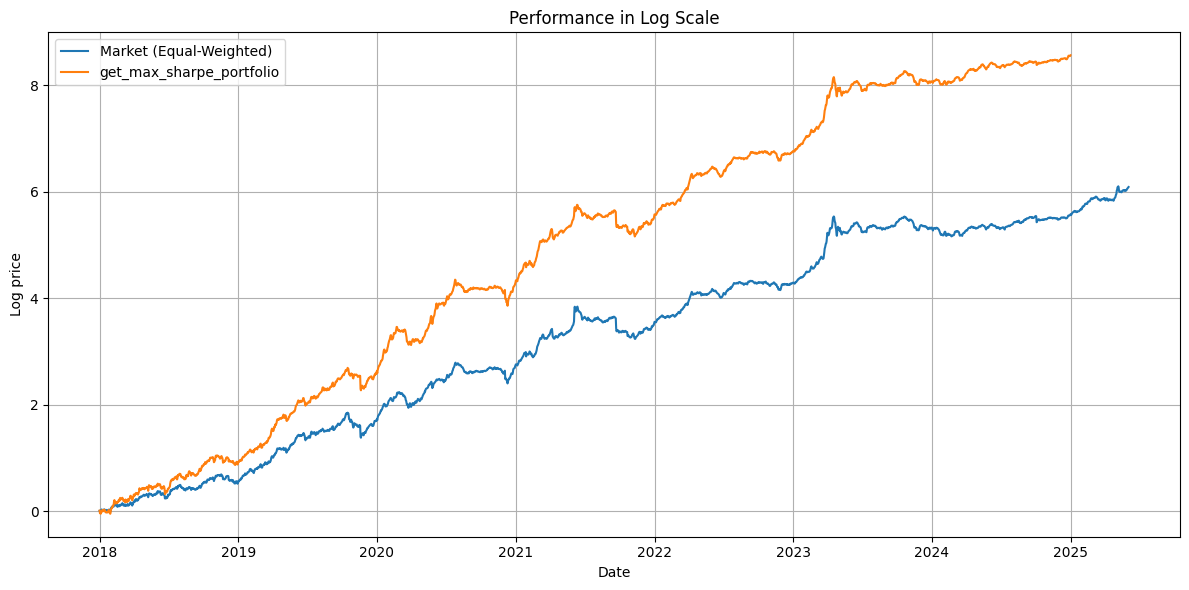

In [23]:
plot_backtest_vs_eq2(
    rets=assets.returns.loc['2018':],
    market=assets.marketret.loc['2018':],
    weight_func=get_max_sharpe_portfolio,
    rebalancing='Y',
    # expected_returns_func=get_expected_returns,

    expected_returns_kwargs={"risk_free_rate": 0.01,"market_rets":assets.marketret},
    weight_func_kwargs={"min_vol_threshold": 1e-6}
)

<string>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
<string>:35: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


Index(['operation_breakout_weapon', 'chroma_2'], dtype='object')
Error at 2018-12-31 00:00:00: Outperforming assets must be in returns columns
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


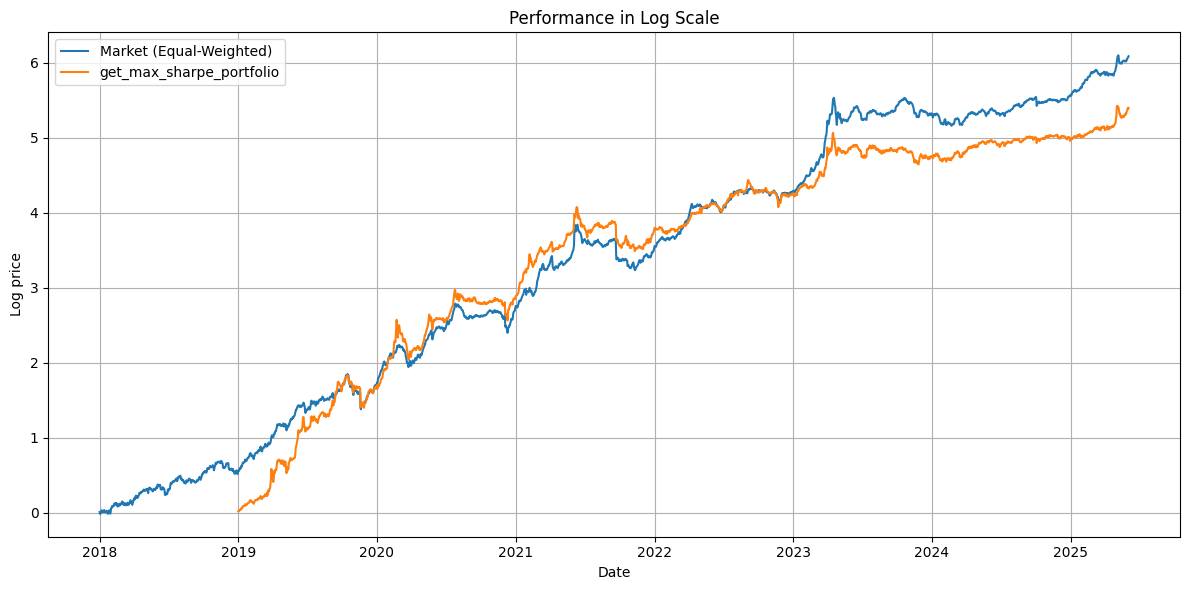

In [34]:

plot_backtest_vs_eq(
    rets=assets.returns.loc['2018':],
    market=assets.marketret.loc['2018':],
    weight_func=get_max_sharpe_portfolio,
    rebalancing='Y',
    expected_returns_func=get_bl_mu,
    covariance_func=get_bl_sigma,


    expected_returns_kwargs={"market_rets":assets.marketret,'outperforming_assets':['operation_breakout_weapon'],'outperformance_values':[0.005]},
    covariance_kwargs={"market_rets":assets.marketret,'outperforming_assets':['operation_breakout_weapon'],'outperformance_values':[0.005]},

    weight_func_kwargs={"min_vol_threshold": 1e-6}
)

In [33]:
assets.returns.columns

Index(['csgo_weapon', 'operation_bravo', 'csgo_weapon_2',
       'winter_offensive_weapon', 'csgo_weapon_3', 'operation_phoenix_weapon',
       'huntsman_weapon', 'operation_breakout_weapon', 'esports_2014_summer',
       'esports_2013', 'esports_2013_winter', 'operation_vanguard_weapon',
       'chroma', 'chroma_2', 'falchion', 'shadow', 'revolver',
       'operation_wildfire', 'chroma_3', 'gamma', 'gamma_2', 'glove',
       'spectrum', 'operation_hydra', 'spectrum_2', 'clutch', 'horizon',
       'danger_zone', 'prisma', 'cs20', 'shattered_web', 'prisma_2',
       'fracture', 'operation_broken_fang', 'snakebite', 'operation_riptide'],
      dtype='object')

In [10]:
df = pd.read_csv(r'../data/processed/D/cases.csv',index_col='date', parse_dates=True)

In [11]:
df

,csgo_weapon,operation_bravo,csgo_weapon_2,winter_offensive_weapon,csgo_weapon_3,operation_phoenix_weapon,huntsman_weapon,operation_breakout_weapon,esports_2014_summer,esports_2013,...,horizon,danger_zone,prisma,cs20,shattered_web,prisma_2,fracture,operation_broken_fang,snakebite,operation_riptide
date,,,,,,,,,,,,,,,,,,,,,
2013-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29 00:00:00+00:00,105.469739,53.084565,12.740000,8.237667,8.935292,5.900833,11.939652,10.544417,12.420842,75.785000,...,1.964917,1.646333,1.446667,1.371333,6.972167,1.464458,0.336250,10.747130,0.455500,14.264826
2025-05-30 00:00:00+00:00,107.763136,53.684391,12.942826,8.556375,8.840333,5.908667,12.239333,10.638125,12.115950,70.606000,...,1.967625,1.607417,1.486208,1.376833,7.134833,1.472042,0.342000,10.810167,0.467250,14.661773
2025-05-31 00:00:00+00:00,109.534208,53.294875,12.952208,8.757565,9.073458,6.013500,12.303042,10.866500,11.881136,73.174833,...,1.987042,1.683583,1.506000,1.390500,7.196708,1.495625,0.347792,10.920208,0.498125,14.510333


In [12]:
calculate_market_returns(df.pct_change().dropna(how='all'))

C:\Users\steph\AppData\Local\Temp\ipykernel_38584\2489392563.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  calculate_market_returns(df.pct_change().dropna(how='all'))


date
2013-11-21 00:00:00+00:00   -0.066055
2013-11-22 00:00:00+00:00    0.033399
2013-11-23 00:00:00+00:00   -0.060837
2013-11-24 00:00:00+00:00   -0.064777
2013-11-25 00:00:00+00:00    0.155844
                               ...   
2025-05-29 00:00:00+00:00    0.013479
2025-05-30 00:00:00+00:00    0.005476
2025-05-31 00:00:00+00:00    0.014338
2025-06-01 00:00:00+00:00    0.005681
2025-06-02 00:00:00+00:00    0.011051
Length: 4212, dtype: float64